In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# загрузка файла с исходными данными
file_path = 'cian_data.csv'
data = pd.read_csv(file_path, header=None)

# добавление названий столбцов
data.columns = [
    "agency_name", "agency_type", "url", "region", "sale_type", "property_type",
    "floor", "total_floors", "rooms", "area", "price_per_m2", "is_mortgage_possible",
    "total_price", "district", "street", "house_number", "metro_station", "residence_name"
]

data

,agency_name,agency_type,url,region,sale_type,property_type,floor,total_floors,rooms,area,price_per_m2,is_mortgage_possible,total_price,district,street,house_number,metro_station,residence_name
0,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
1,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
2,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
3,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
4,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,VESPER,developer,https://www.cian.ru/sale/flat/286258299/,Моска и Московская область,sale,flat,5.0,9,2,104.2,-1,0,150958800,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya
11740,Интеллект,developer,https://krym.cian.ru/sale/flat/295983885/,Моска и Московская область,sale,flat,2.0,13,1,38.3,-1,0,12928244,NaN,NaN,NaN,NaN,Парковая Резиденция
11741,ID 85604823,unknown,https://www.cian.ru/sale/flat/308497818/,Моска и Московская область,sale,flat,16.0,41,2,51.0,-1,0,34000000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха,Сердце Столицы
11742,Никита Гаврилов,realtor,https://www.cian.ru/sale/flat/308929771/,Моска и Московская область,sale,flat,5.0,17,2,60.0,-1,0,18550000,Марьино,Новочеркасский бульвар,47,Марьино,NaN


In [ ]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

agency_type              436
url                      436
region                   437
sale_type                440
property_type            440
floor                    442
total_floors             442
rooms                    442
area                     442
price_per_m2             443
is_mortgage_possible     445
total_price              447
district                3159
street                  3465
house_number            3828
metro_station           5201
residence_name          3735
dtype: int64

In [ ]:
numeric_columns = ['total_price', 'area', 'rooms', 'floor', 'total_floors']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data_cleaned = data.copy()
data_cleaned['price_per_m2'] = data_cleaned['total_price'] / data_cleaned['area']

In [ ]:
print(f"Количество записей: {len(data_cleaned)}")

Количество записей: 11744


In [ ]:
data_cleaned.shape

(11744, 18)

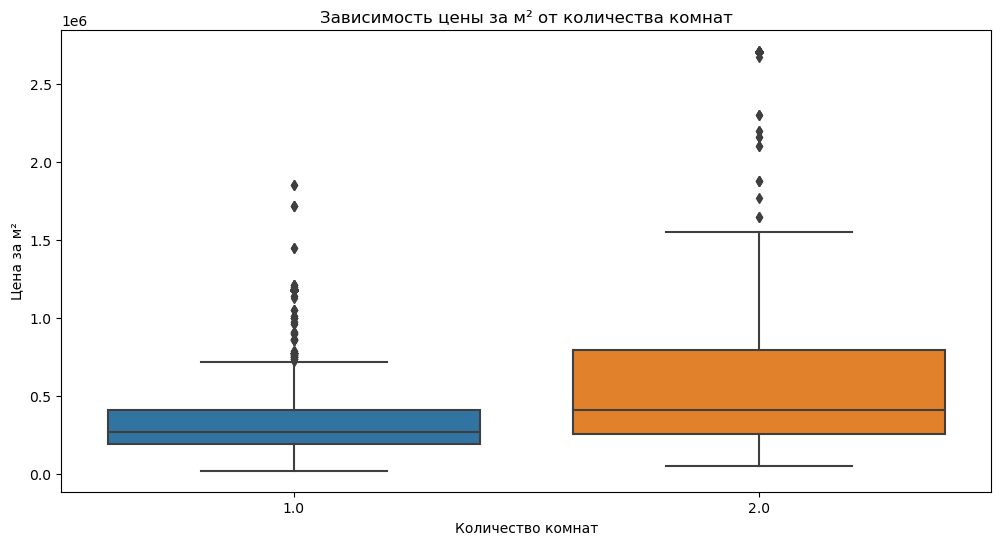

In [ ]:
# 2. АНАЛИЗ КОЛИЧЕСТВА КОМНАТ
room_prices = data_cleaned.groupby('rooms')['price_per_m2'].mean()

plt.figure(figsize=(12, 6))
sns.boxplot(x='rooms', y='price_per_m2', data=data_cleaned[data_cleaned['rooms'].between(1, 4)])
plt.title('Зависимость цены за м² от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за м²')
plt.show()


In [ ]:
print("СРЕДНИЕ ЦЕНЫ ЗА М² (КОМНАТЫ):")
for rooms in sorted(room_prices.index):
    if 1 <= rooms <= 4:
        print(f"{rooms}-комнатная: {room_prices[rooms]:,.0f} руб/м²")

СРЕДНИЕ ЦЕНЫ ЗА М² (КОМНАТЫ):
1.0-комнатная: 366,060 руб/м²
2.0-комнатная: 593,486 руб/м²


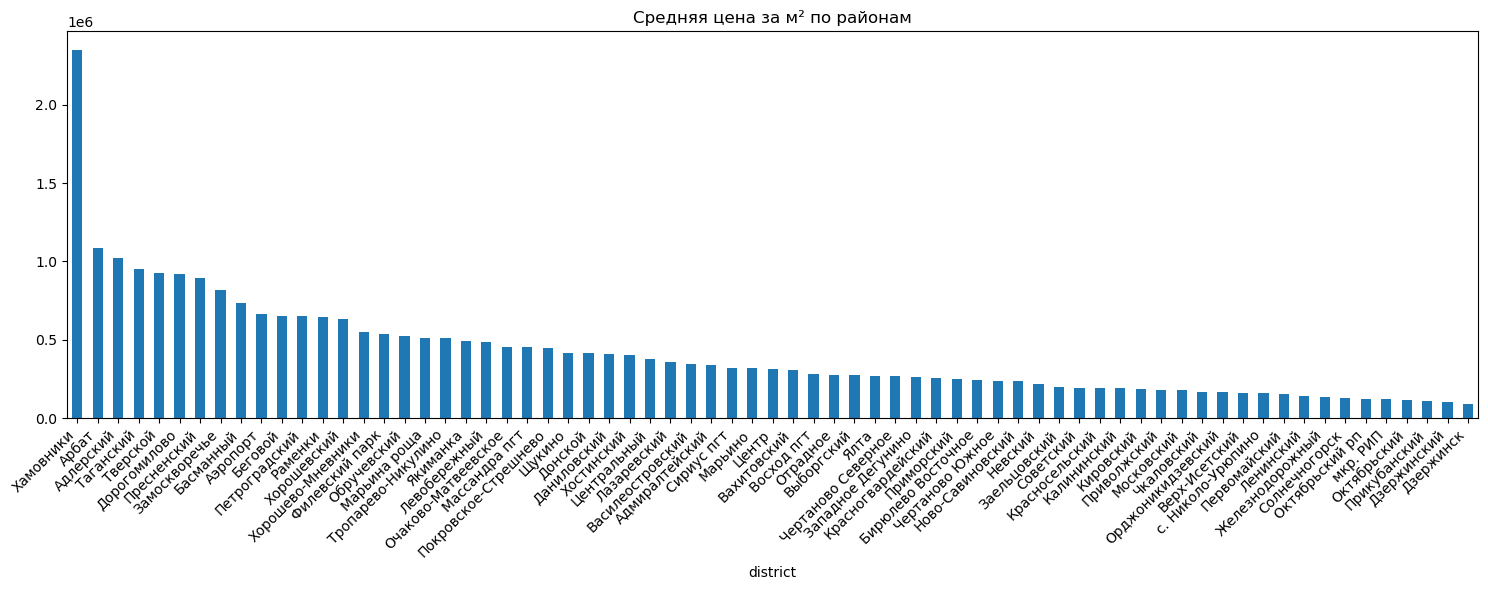

In [ ]:
# 3. АНАЛИЗ РАЙОНОВ

district_stats = data_cleaned.groupby('district')['price_per_m2'].agg(['mean', 'count'])
district_stats = district_stats[district_stats['count'] > 10]  # берем районы с более чем 5 объявлениями
district_stats = district_stats.sort_values('mean', ascending=False)

plt.figure(figsize=(15, 6))
district_stats['mean'].plot(kind='bar')
plt.title('Средняя цена за м² по районам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

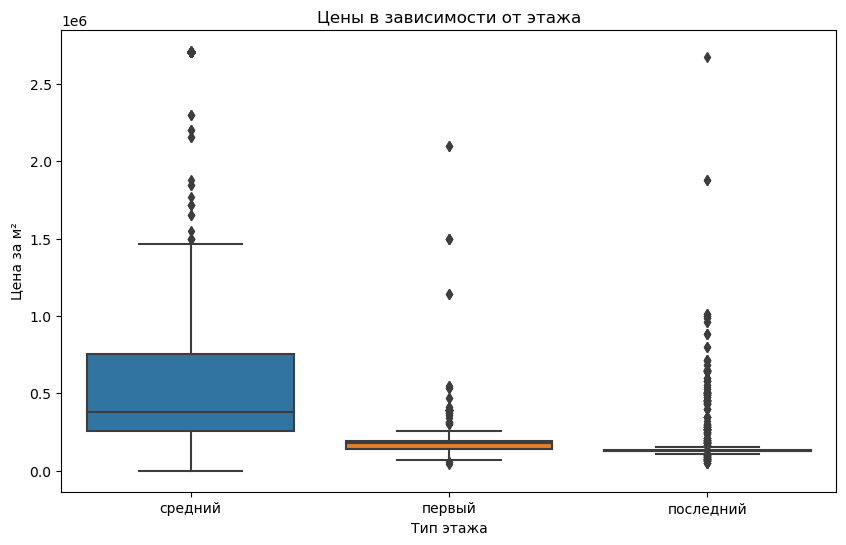

СРЕДНИЕ ЦЕНЫ ЗА М² (ЭТАЖНОСТЬ):
Первый этаж: 224,284 руб/м²
Средние этажи: 558,232 руб/м²
Последний этаж: 201,185 руб/м²


In [ ]:
# 4. АНАЛИЗ ЭТАЖНОСТИ
data_cleaned['floor_type'] = 'средний'
data_cleaned.loc[data_cleaned['floor'] == 1, 'floor_type'] = 'первый'
data_cleaned.loc[data_cleaned['floor'] == data_cleaned['total_floors'], 'floor_type'] = 'последний'

floor_prices = data_cleaned.groupby('floor_type')['price_per_m2'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(x='floor_type', y='price_per_m2', data=data_cleaned)
plt.title('Цены в зависимости от этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена за м²')
plt.show()

print("СРЕДНИЕ ЦЕНЫ ЗА М² (ЭТАЖНОСТЬ):")
print(f"Первый этаж: {floor_prices['первый']:,.0f} руб/м²")
print(f"Средние этажи: {floor_prices['средний']:,.0f} руб/м²")
print(f"Последний этаж: {floor_prices['последний']:,.0f} руб/м²")

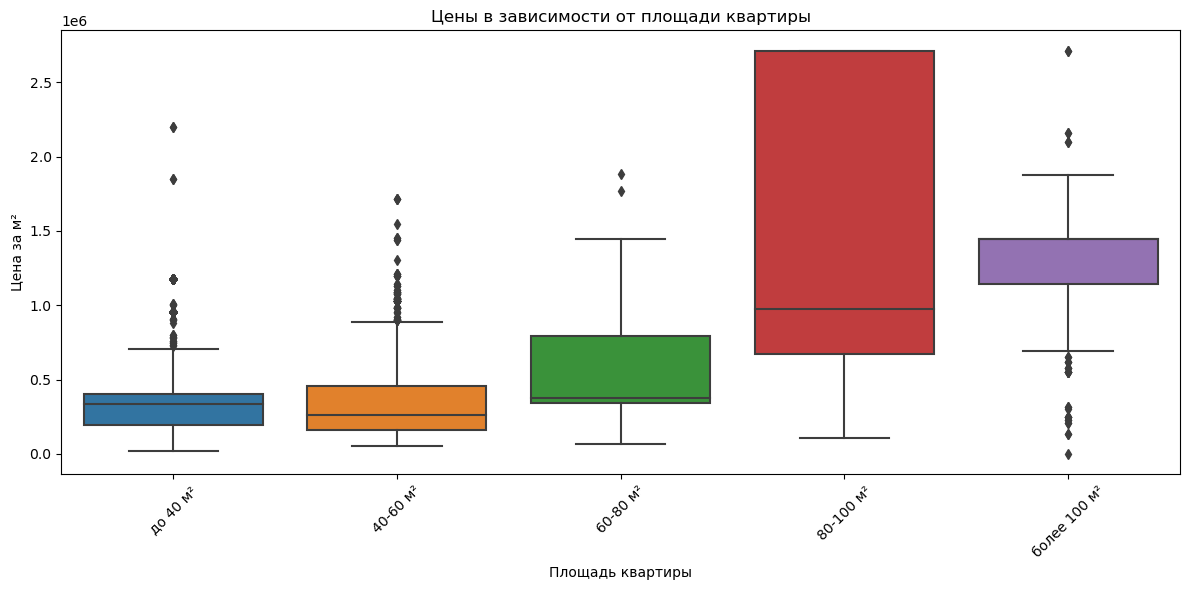

In [ ]:
# 4. АНАЛИЗ ПЛОЩАДИ
# Создаем категории площади
data_cleaned['area_category'] = pd.cut(data_cleaned['area'],
                                     bins=[0, 40, 60, 80, 100, float('inf')],
                                     labels=['до 40 м²', '40-60 м²', '60-80 м²', '80-100 м²', 'более 100 м²'])

# Считаем средние цены по категориям
area_prices = data_cleaned.groupby('area_category')['price_per_m2'].mean()

# Определяем порядок категорий
category_order = ['до 40 м²', '40-60 м²', '60-80 м²', '80-100 м²', 'более 100 м²']

# Строим график
plt.figure(figsize=(12, 6))
# Используем data_cleaned вместо data и указываем порядок категорий
sns.boxplot(x='area_category', y='price_per_m2',
           data=data_cleaned,
           order=category_order)

# Настраиваем график
plt.title('Цены в зависимости от площади квартиры')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена за м²')
plt.xticks(rotation=45)
plt.tight_layout()  # Добавляем для лучшего отображения
plt.show()

In [ ]:
data_cleaned['has_metro'] = data_cleaned['metro_station'].notna().astype(int)
metro_prices = data_cleaned.groupby('has_metro')['price_per_m2'].mean()

print("СРЕДНИЕ ЦЕНЫ ЗА М² (ПЛОЩАДЬ):")
for category in area_prices.index:
    print(f"{category}: {area_prices[category]:,.0f} руб/м²")

print("ИТОГОВЫЕ ВЫВОДЫ:")
print("1. Влияние метро:")
print(f"- Разница в цене: {(metro_prices[1] - metro_prices[0]):,.0f} руб/м²")
print(f"- Процентная надбавка: {((metro_prices[1] / metro_prices[0] - 1) * 100):.1f}%")

print("2. Разница по этажам:")
print(f"- Между средним и первым: {(floor_prices['средний'] - floor_prices['первый']):,.0f} руб/м²")
print(f"- Между средним и последним: {(floor_prices['средний'] - floor_prices['последний']):,.0f} руб/м²")

СРЕДНИЕ ЦЕНЫ ЗА М² (ПЛОЩАДЬ):
до 40 м²: 404,787 руб/м²
40-60 м²: 337,653 руб/м²
60-80 м²: 546,398 руб/м²
80-100 м²: 1,374,453 руб/м²
более 100 м²: 1,252,376 руб/м²
ИТОГОВЫЕ ВЫВОДЫ:
1. Влияние метро:
- Разница в цене: 277,680 руб/м²
- Процентная надбавка: 76.9%
2. Разница по этажам:
- Между средним и первым: 333,947 руб/м²
- Между средним и последним: 357,047 руб/м²


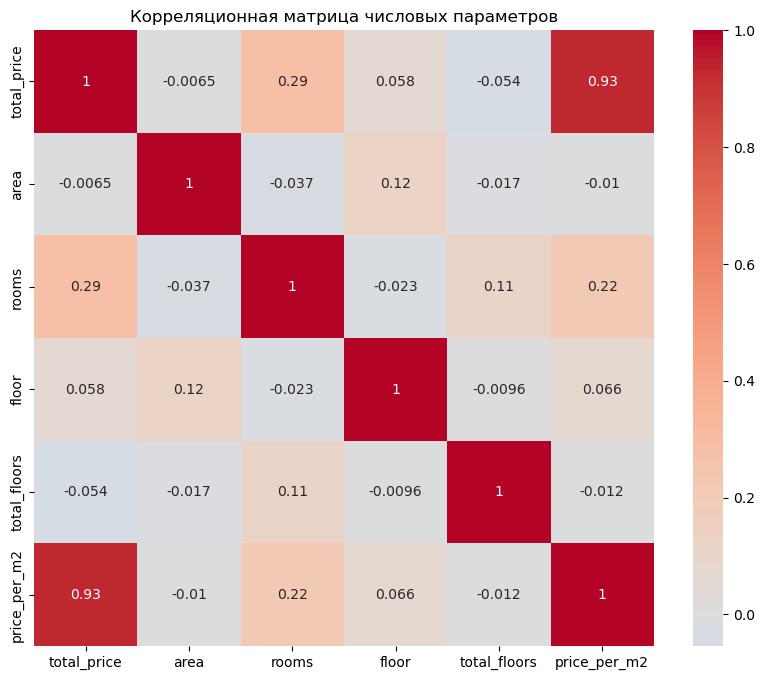

In [ ]:
# КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
# Создаем матрицу корреляций для числовых параметров
numeric_cols = ['total_price', 'area', 'rooms', 'floor', 'total_floors', 'price_per_m2']
correlation_matrix = data_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых параметров')
plt.show()

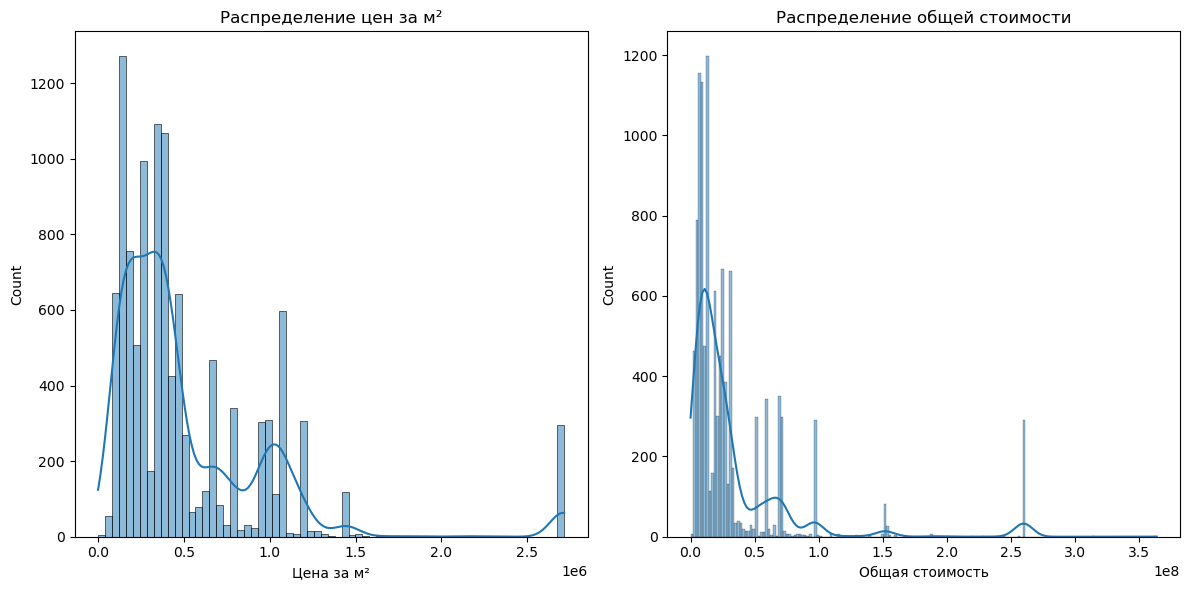

In [ ]:
# РАСПРЕДЕЛЕНИЕ ЦЕН
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['price_per_m2'], kde=True)
plt.title('Распределение цен за м²')
plt.xlabel('Цена за м²')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['total_price'], kde=True)
plt.title('Распределение общей стоимости')
plt.xlabel('Общая стоимость')
plt.tight_layout()
plt.show()

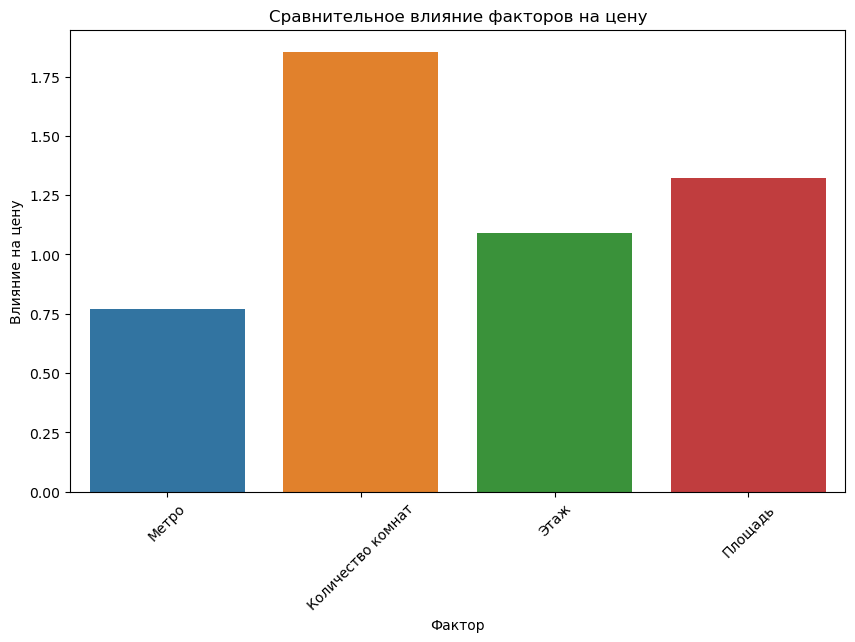

ОСНОВНЫЕ ВЫВОДЫ:
1. КОРРЕЛЯЦИИ:
- total_price и price_per_m2: 0.93
2. НАИБОЛЕЕ ЗНАЧИМЫЕ ФАКТОРЫ:
- Количество комнат: 185.6% влияния на цену
- Площадь: 132.4% влияния на цену
- Этаж: 108.9% влияния на цену
- Метро: 76.9% влияния на цену
3. РАСПРЕДЕЛЕНИЕ ЦЕН:
- Медианная цена за м²: 375,900 руб
- 25% квартир дешевле: 217,773 руб/м²
- 75% квартир дешевле: 674,432 руб/м²


In [ ]:
# СРАВНИТЕЛЬНЫЙ АНАЛИЗ ВЛИЯНИЯ ФАКТОРОВ
# Создаем DataFrame с влиянием различных факторов
factor_impact = pd.DataFrame({
    'Фактор': ['Метро', 'Количество комнат', 'Этаж', 'Площадь'],
    'Влияние на цену': [
        abs((metro_prices[1] - metro_prices[0]) / metro_prices[0]),
        abs(room_prices.max() - room_prices.min()) / room_prices.mean(),
        abs(floor_prices.max() - floor_prices.min()) / floor_prices.mean(),
        abs(area_prices.max() - area_prices.min()) / area_prices.mean()
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=factor_impact, x='Фактор', y='Влияние на цену')
plt.title('Сравнительное влияние факторов на цену')
plt.xticks(rotation=45)
plt.show()
price_stats = data_cleaned['price_per_m2'].describe()

print("ОСНОВНЫЕ ВЫВОДЫ:")
print("1. КОРРЕЛЯЦИИ:")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.3:  # выводим только значимые корреляции
            print(f"- {numeric_cols[i]} и {numeric_cols[j]}: {corr:.2f}")

print("2. НАИБОЛЕЕ ЗНАЧИМЫЕ ФАКТОРЫ:")
for idx, row in factor_impact.sort_values('Влияние на цену', ascending=False).iterrows():
    print(f"- {row['Фактор']}: {row['Влияние на цену']*100:.1f}% влияния на цену")

print("3. РАСПРЕДЕЛЕНИЕ ЦЕН:")
print(f"- Медианная цена за м²: {price_stats['50%']:,.0f} руб")
print(f"- 25% квартир дешевле: {price_stats['25%']:,.0f} руб/м²")
print(f"- 75% квартир дешевле: {price_stats['75%']:,.0f} руб/м²")

